# Résultats des analyses sur la campagne visite 2 pages 1 de l'annonceur 1

Nous présentons ici les résultats graphiques et leur analyse pour la campagne mentionnée.

In [1]:
#fichiers contenant les fonctions utiles
import pandas as pd
from premiere_analyse import *
from testZ import testZ, proportions, testZ_cum
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
import statsmodels.api as sm

import numpy as np
import scipy.stats as st
import seaborn as sns
sns.set_style("white")

In [2]:
#données de la campagne
folder = 'C:/Users/Admin/Documents/Centrale Paris/3A/OMA/Projet 1000mercis/Donnees/'
annonceur = 'annonceur1/annonceur1'
campagne = 'annonceur1_campaign1_visite_2pages'
data = pd.read_hdf(folder + annonceur + '.hdf', key=campagne)

##### Analyse du taux de conversion journaliers des versions A et B de la bannière en tant que série temporelle

In [3]:
#préparation des données
dataA, dataB = preparer(data) 

Conversion des index en dates
Moyennes des taux par jour et séparation en deux groupes A et B


In [4]:
#moyenne des taux de conversion des deux versions
print(data.groupby('group')['is_conv'].mean())


group
A    0.007619
B    0.007700
Name: is_conv, dtype: float64



Est-ce qu'il y a un pattern (journalier, hebdomadaire, mensuel, ...) dans le taux de conversion ou la différence relative de taux de conversion ? On ajoutera aussi le nombre total de conversions pour la fréquence donnée afin de savoir si une importante différence relative est significative ou pas (si c'est 100% mais pour un 1 vs 2 par exemple).

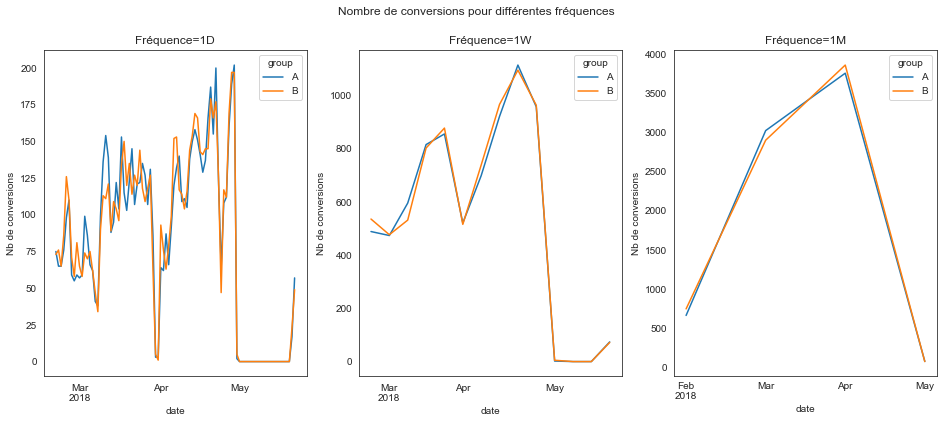

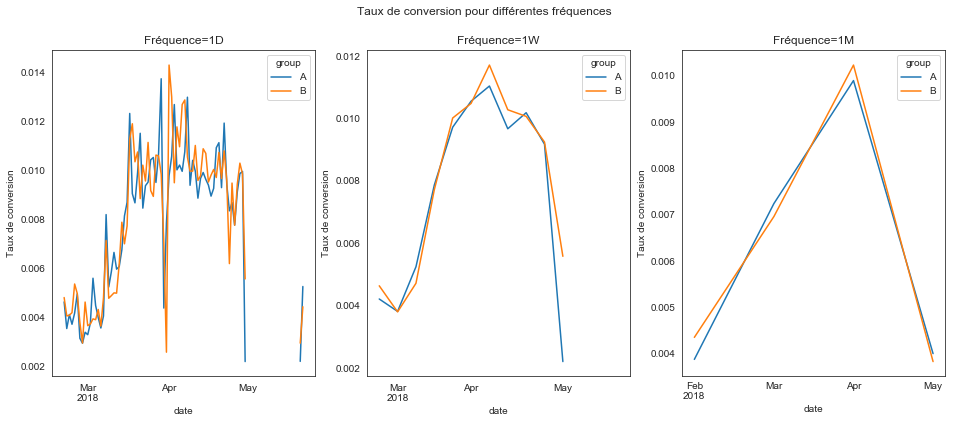

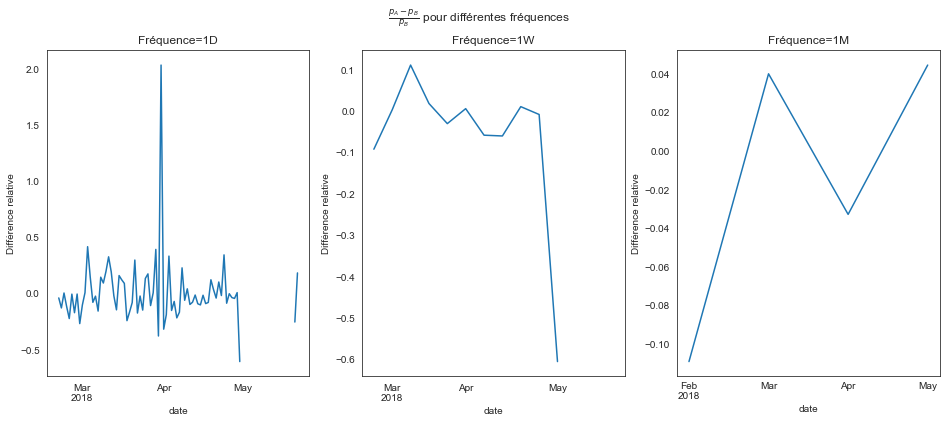

In [5]:
freq_list = ["1D", "1W", "1M"]

conv_rate = {}
pct_change = {}
conv_count = {}

for freq in freq_list:
    conv_count[freq] = conversion_count_resample(data, freq)
    conv_rate[freq] = conversion_rate_resample(data, freq)
    pct_change[freq] = (conv_rate[freq]["A"] - conv_rate[freq]["B"]) / conv_rate[freq]["B"]
    # attention il y a des NaN quand il y a pas de conversion du groupe B

# trace des taux de conversion pour frequences differentes
plt.figure(figsize=(16, 6))
for i, freq in enumerate(freq_list):
    plt.subplot(1, len(freq_list), i+1)
    conv_count[freq].plot(ax=plt.gca())
    plt.title(f"Fréquence={freq}")
    plt.ylabel('Nb de conversions')
plt.suptitle('Nombre de conversions pour différentes fréquences')
plt.show()

# trace des taux de conversion pour frequences differentes
plt.figure(figsize=(16, 6))
for i, freq in enumerate(freq_list):
    plt.subplot(1, len(freq_list), i+1)
    conv_rate[freq].plot(ax=plt.gca())
    plt.title(f"Fréquence={freq}")
    plt.ylabel('Taux de conversion')
plt.suptitle('Taux de conversion pour différentes fréquences')
plt.show()

# trace des variations relatives pour frequences differentes
plt.figure(figsize=(16, 6))
for i, freq in enumerate(freq_list):
    plt.subplot(1, len(freq_list), i+1)
    pct_change[freq].plot(ax=plt.gca())
    plt.title(f"Fréquence={freq}")
    plt.ylabel('Différence relative')
plt.suptitle('$\\frac{p_A - p_B}{p_B}$ pour différentes fréquences')
plt.show()

Dans l'ensemble il n'y a pas de tendance marquante permettant de distinguer le groupe A du groupe B quel que soit l'échelle considérée.

En revanche, le changement de fréquence permet un lissage des données avec moins de variance.

### Version A

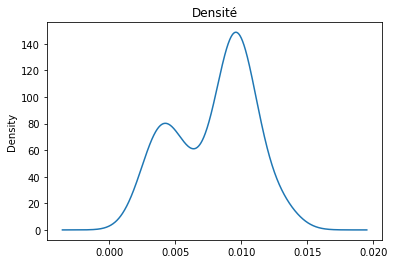

## Analyse classique d'une ST

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


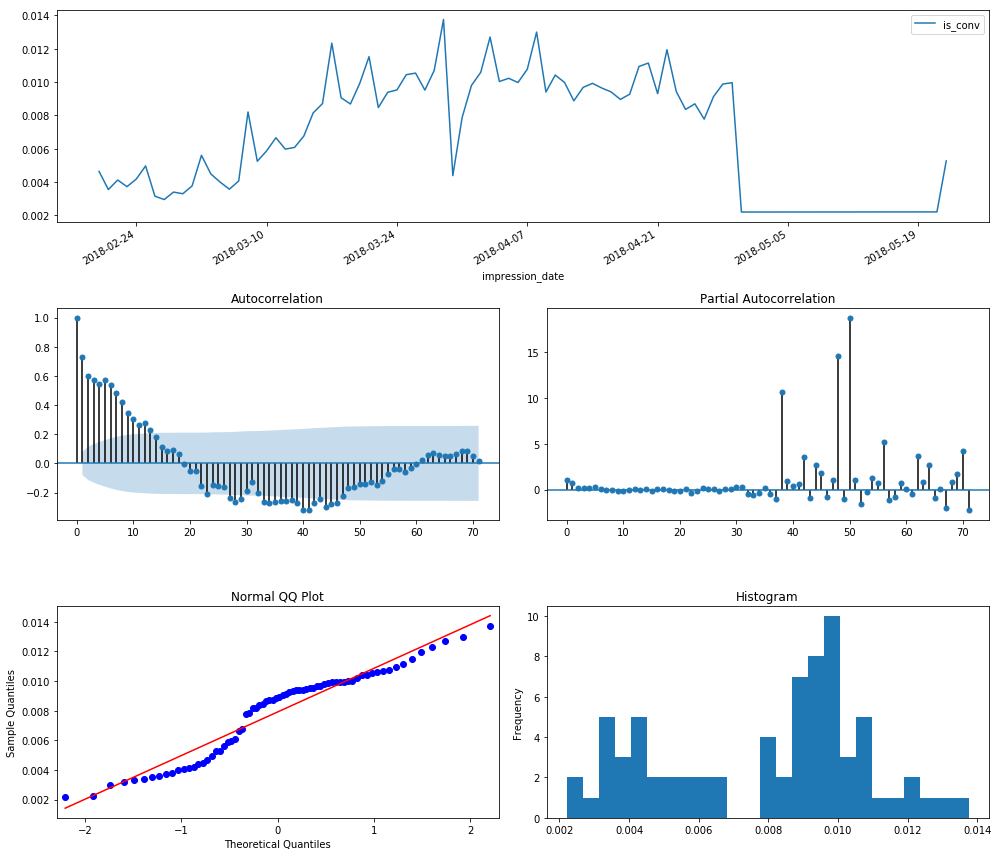

## Effet journalier

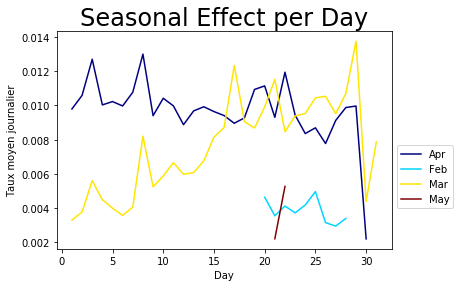

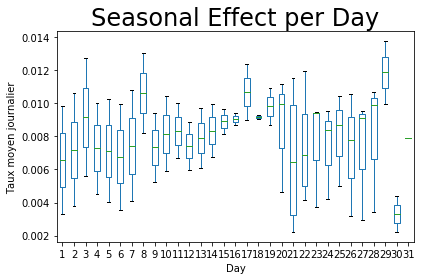

## Décomposition de la série de temps selon modèle multiplicatif

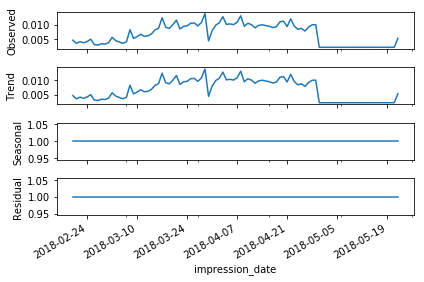

## Test de Dickey-Fuller

,Results of Augmented Dickey-Fuller test:
test statistic,-3.268935
p-value,0.016325
# of lags,0.000000
# of observations,71.000000
Critical Value (1%),-3.526005
Critical Value (5%),-2.903200
Critical Value (10%),-2.588995


In [12]:
#Analyse temporelle du taux de conversion A
analyser(dataA)

#### Analyse des résultats obtenus sur la version A du taux de conversion journalier
+ L'histogramme et la densité indiquent un taux de conversion journalier pour la version A qui se situe majoritairement dans deux zones : entre 0.004 et 0.006 et entre 0.008 et 0.011, que sont de très faibles valeurs.
+ Le tracé de la série des taux journaliers montre une augmentation du taux entre le 10 mars et fin avril puis une redescente brutale ainsi qu'un pic vers le fin mars.
+ La fonction d'autocorrélation peut nous faire penser à un modèle AR(p) par sa décroissance lente avec le lag.
+ Les graphiques des effets saisonniers par jour ne permettent pas de mettre en avant une tendance journalière sur le mois mais montrent le pic vers le bas.
+ La décomposition de la série temporelle ne révèle pas d'effet de saison.
+ Test de Dickey-Fuller indique que la série n'est pas stationnaire car la statistique de test est plus élevée que la valeur critique à 1%. On réalise donc une tranformation sur la série pour la rendre stationnaire.

Différencier à l'ordre 1: y_t - y_[t-1]
Analyse après transformation



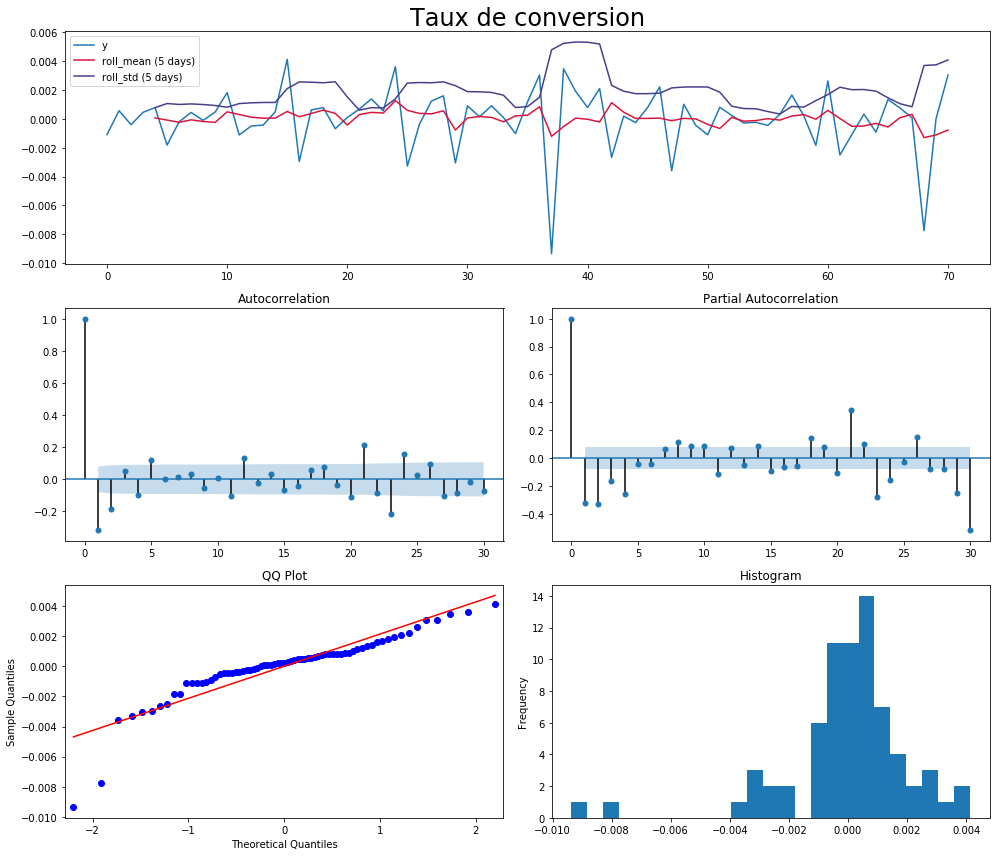

,Results of Augmented Dickey-Fuller test:
test statistic,-6.321411e+00
p-value,3.059650e-08
# of lags,3.000000e+00
# of observations,6.700000e+01
Critical Value (1%),-3.531955e+00
Critical Value (5%),-2.905755e+00
Critical Value (10%),-2.590357e+00


In [13]:
transformer(dataA,"diff1")

Après différenciation, la série est stationnaire d'après le test de Dickey-Fuller. Les tracés de la séries et des fonctions ACF et PACF le prouvent également: moyenne nulle et valeurs des fonctions quasi nulles après le lag 0.

### Version B

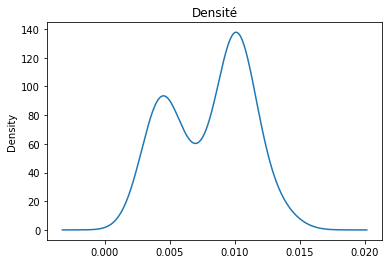

## Analyse classique d'une ST

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


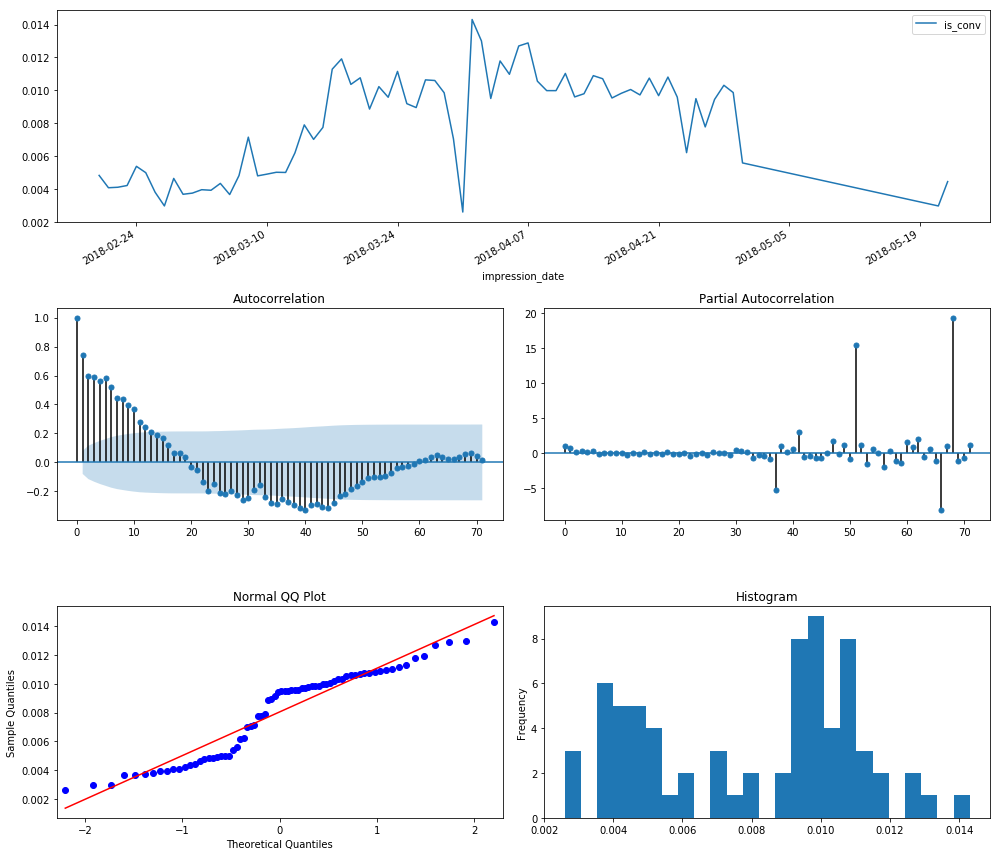

## Effet journalier

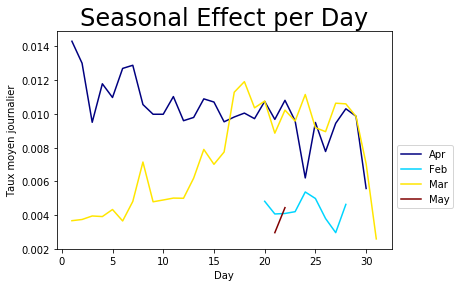

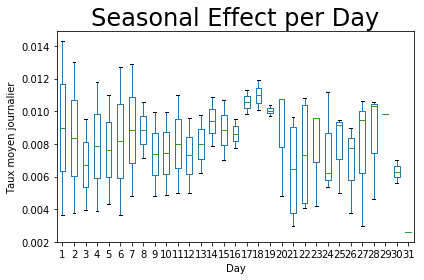

## Décomposition de la série de temps selon modèle multiplicatif

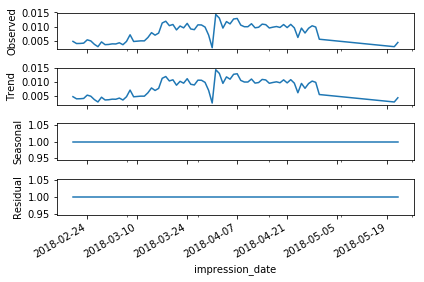

## Test de Dickey-Fuller

,Results of Augmented Dickey-Fuller test:
test statistic,-1.791373
p-value,0.384753
# of lags,2.000000
# of observations,69.000000
Critical Value (1%),-3.528890
Critical Value (5%),-2.904440
Critical Value (10%),-2.589656


In [14]:
#analyse temporelle du taux de conversion B
analyser(dataB)

#### Analyse des résultats obtenus sur la version B du taux de conversion journalier:
+ L'histogramme et la densité indiquent un taux de conversion journalier pour la version B qui se situe majoritairement dans deux zones : entre 0.004 et 0.006 et entre 0.009 et 0.012, que sont de très faibles valeurs, similaires à la version A.
+ Le tracé de la série des taux journaliers montre une augmentation du taux entre le 10 mars et fin avril puis une redescente brutale comme pour la A, avec un pic vers le bas début avril ou fin mars, plus intense que pour la A.
+ La fonction d'autocorrélation peut nous faire penser à un modèle AR(p) par sa décroissance lente avec le lag.
+ Les graphiques des effets saisonniers par jour ne permettent pas de mettre en avant une tendance journalière sur le mois. Il révèlent cependant le pic vers le bas qui a eu lieu fin mars pour la version B.
+ La décomposition de la série temporelle ne révèle pas d'effet de saison.
+ Test de Dickey-Fuller indique que la série n'est pas stationnaire car la statistique de test est plus élevée que la valeur critique à 1%. On réalise donc une tranformation sur la série pour la rendre stationnaire.

Différencier à l'ordre 1: y_t - y_[t-1]
Analyse après transformation



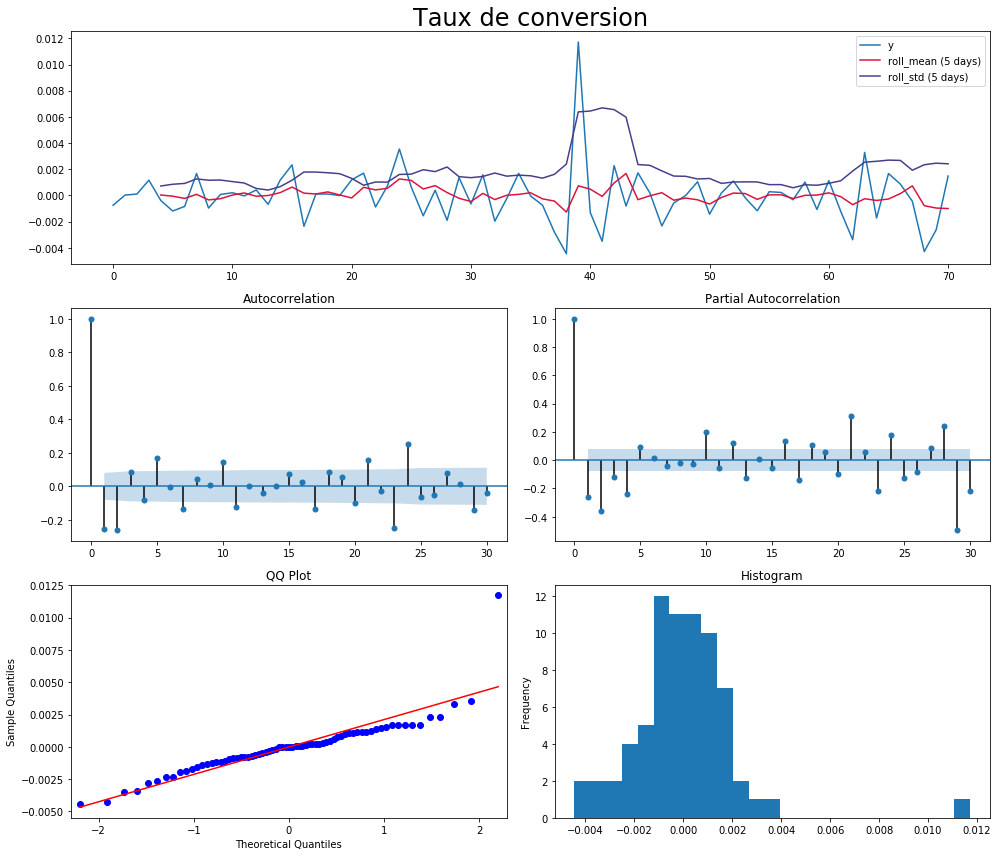

,Results of Augmented Dickey-Fuller test:
test statistic,-6.268310e+00
p-value,4.062423e-08
# of lags,3.000000e+00
# of observations,6.700000e+01
Critical Value (1%),-3.531955e+00
Critical Value (5%),-2.905755e+00
Critical Value (10%),-2.590357e+00


In [15]:
transformer(dataB,"diff1")

Après différenciation, la série est stationnaire d'après le test de Dickey-Fuller. Les tracés de la séries et des fonctions ACF et PACF le prouvent également: moyenne nulle et valeurs des fonctions quasi nulles après le lag 0.

### Test Z

Enfin, on réalise un test Z sur les données ave H0 "les taux de conversion A et B sont similaires". Le test nous donnera une statistique qui nous permettra de calculer la p-valeur i.e. la probabilité de rejeter l'hypothèse nulle H0.

In [16]:
testZ(data)

(-0.6485381292262641, 0.5166369577625818)

Nous avons ici: Zstat = -0.65 et Prej = 0.52. On ne peut donc pas rejeter l'hypothèse nulle: aucune des deux versions n'est meilleure que l'autre en termes de taux de conversion journalier.

Est-ce que le Z-test aurait donné des résultats différents si l'on a arrêté le test A/B à des instants plus tôt ? On réalise un Z-test roulant.

In [6]:
Z_cum, P_rej, p_cum = testZ_cum(data)

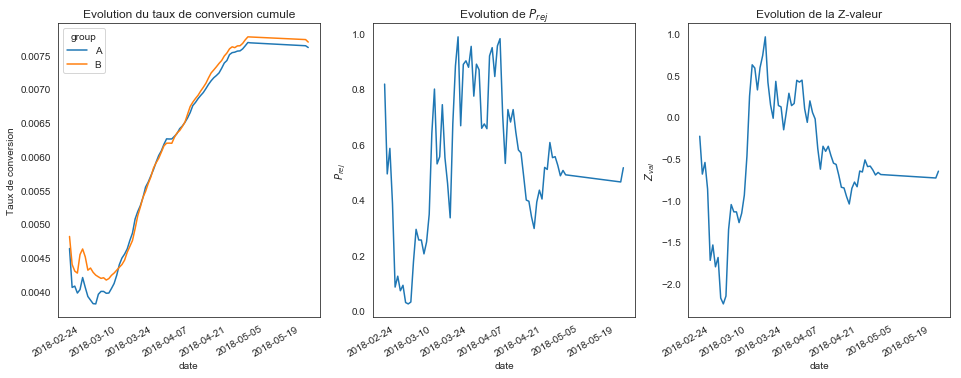

In [11]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
p_cum.plot(title="Evolution du taux de conversion cumule", ax=plt.gca())
plt.ylabel("Taux de conversion")

plt.subplot(1, 3, 2)
P_rej.plot(title='Evolution de $P_{rej}$', ax=plt.gca())
plt.ylabel('$P_{rej}$')

plt.subplot(1, 3, 3)
Z_cum.plot(title='Evolution de la Z-valeur', ax=plt.gca())
plt.ylabel('$Z_{val}$')

plt.show();

In [10]:
print("P_rej")
print(P_rej.describe())

print("Z_cum")
print(Z_cum.describe())

P_rej
count    72.000000
mean      0.544960
std       0.259647
min       0.025047
25%       0.391443
50%       0.542276
75%       0.726415
max       0.988954
Name: P_rej, dtype: float64
Z_cum
count    72.000000
mean     -0.476657
std       0.718628
min      -2.240675
25%      -0.850924
50%      -0.560179
75%       0.126342
max       0.962635
dtype: float64


Les résultats du Z test sont donc très différents en fonction de l'instant considéré : si on s'était arrêté vers début Mars vs fin Mars. Il serait peut-être intéressant d'étudier la stationnarité de la série des P_rej ou de la valeur Z.